In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time
import os

In [2]:
from sklearn.metrics import f1_score,precision_score,recall_score
from sklearn.preprocessing import StandardScaler

In [3]:
seed=42
import joblib

In [4]:
def calculate_quartiles_and_iqr(values):
    q1 = np.percentile(values, 25)
    q3 = np.percentile(values, 75)
    
    # Calculate IQR
    iqr = q3 - q1
    
    return q1,q3,iqr

In [5]:
PATH='OUTPUT/MODIFIED_TYPE_3'
all_files=os.listdir(PATH)
files=[]
for f in all_files:
    if f.endswith('csv'):
        files.append(f)
all_files=files
anomaly_type=3

In [6]:
f1_scores = []
prec_scores=[]
recall_scores=[]
for fi in all_files:
    bid = fi.split('_')[0]
    path = PATH+'/'+fi
    building = pd.read_csv(path)
    if 'modified' not in building.columns:
        print('building id:',bid)
        print('No modified data')
        continue
    X_train=building['modified']
    y_train = building['labels'].values
    y_train=np.where(y_train != 0,1,0)
    
    if np.sum(y_train)==0:
        print('building id:',bid)
        print('Number of anomalies:',np.sum(y_train))
        print('Number of normal:',len(y_train)-np.sum(y_train))
    
    scaler=StandardScaler()
    X_train=scaler.fit_transform(pd.DataFrame(X_train))
    ind_best_f1=0
    q1,q3,iqr=calculate_quartiles_and_iqr(X_train)
    for K in range(5,45,5):
        K/=10 #0.5,1,1.5,2,...
        low=q1-K*iqr
        high=q3+K*iqr
        y_pred=np.zeros(len(y_train))
        bool_array= (X_train>high) | (X_train<low)
        bool_array=bool_array.reshape(-1)
        y_pred[bool_array]=1
        
        score_f1=f1_score(y_train,y_pred, zero_division=0)

        if score_f1> ind_best_f1:
            score_prec=precision_score(y_train,y_pred, zero_division=0)
            score_recall=recall_score(y_train,y_pred, zero_division=0)
            ind_best_f1=score_f1
            ind_best_prec=score_prec
            ind_best_recall=score_recall
    f1_scores.append(ind_best_f1)
    prec_scores.append(ind_best_prec)
    recall_scores.append(ind_best_recall)

In [7]:
print(np.mean(f1_scores))

0.7077791243095065


In [8]:
print(np.mean(prec_scores))

0.7516151057378723


In [9]:
print(np.mean(recall_scores))

0.7537931066625216


In [10]:
import matplotlib.pyplot as plt


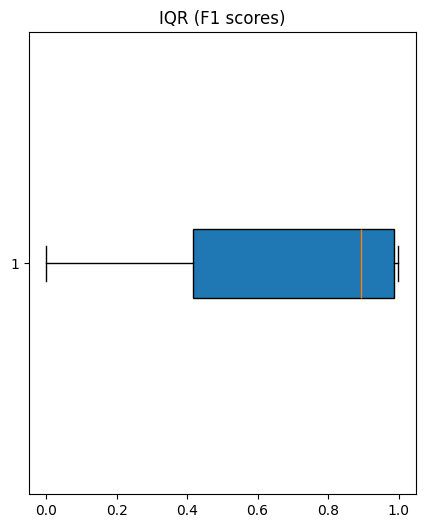

In [11]:
fig,ax=plt.subplots(figsize=(5,6))
ax.boxplot(f1_scores,patch_artist = True,
                notch =False, vert = 0)
ax.set_title("IQR (F1 scores)")
fig.savefig(f"type_{anomaly_type}_IQR.png")

In [12]:
f1_score_dict={}
for idx,fi in enumerate(all_files):
    bid=int(fi.split("_")[0])
    f=f1_scores[idx]
    f1_score_dict[bid]=f

In [13]:
joblib.dump(f1_score_dict,f"OUTPUT/SCORES/IQR_type_{anomaly_type}_f1_scores.pkl")

['OUTPUT/SCORES/IQR_type_3_f1_scores.pkl']